# データ収集

In [ ]:
!wget https://www.rondhuit.com/download/ldcc-20140209.tar.gz

--2021-10-20 00:28:41--  https://www.rondhuit.com/download/ldcc-20140209.tar.gz
Resolving www.rondhuit.com (www.rondhuit.com)... 59.106.19.174
Connecting to www.rondhuit.com (www.rondhuit.com)|59.106.19.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8855190 (8.4M) [application/x-gzip]
Saving to: ‘ldcc-20140209.tar.gz.1’

ldcc-20140209.tar.g 100%[===================>]   8.44M  7.86MB/s    in 1.1s    

2021-10-20 00:28:43 (7.86 MB/s) - ‘ldcc-20140209.tar.gz.1’ saved [8855190/8855190]



In [ ]:
!tar zfx ldcc-20140209.tar.gz

In [ ]:
cd text/

/content/text


In [ ]:
!head -n 5 kaden-channel/kaden-channel-5774093.txt

http://news.livedoor.com/article/detail/5774093/
2011-08-10T10:00:00+0900
【ニュース】電力使用量９日が８社管内で今夏最高
気温が高い日が続く。特に９日は各地で気温が上がった。気温が上がるとどうしても比例するのが電力使用量だ。９日は、全国の電力会社のうち８社の管内で、いずれも最大電力使用量が今夏最高を記録した。北海道、沖縄電力を除くすべての管内で、この夏一番の電力使用量を記録したが、これはやはり冷房の使用が原因だという。１０日も暑くなることが予測されているため、さらに更新する可能性もある。



In [ ]:
!pip install transformers fugashi ipadic

# データ前処理

In [ ]:
import os
import glob
import re
from collections import Counter
import fugashi
import ipadic
from transformers import BertJapaneseTokenizer

import pandas as pd

In [ ]:
import unicodedata
def preprocess_text(x):
  t = unicodedata.normalize("NFKC", x)
  t = re.sub("\s", "", t)
  t = re.sub("\(.*?\)", "", t)
  t = re.sub("\<.*?\>", "", t)
  return t

In [ ]:
article_datas = []
for dir_path in glob.glob("*/"):
  dir_path = dir_path[:-1] # /が付いているため
  for file_path in glob.glob(os.path.join(dir_path, f"{dir_path}-*.txt")):
    with open(file_path, "r") as f:
      file_lines = f.readlines()
      article_datas.append([
        # URLは現状使わない file_lines[0], 
        # file_lines[1].strip("\n"), #date
        # file_lines[2].strip("\n"), #title
        preprocess_text("".join(file_lines[3:]).strip("\n")), # content
        dir_path, #target
      ])
  

df = pd.DataFrame(article_datas, columns=["content", "category"])
df.head()

,content,category
0,世界各国で公開され、全米を始め各国で記録ラッシュが続いている映画『アベンジャーズ』の第2弾と...,movie-enter
1,日本中に大ブームを巻き起こした名作「ひみつのアッコちゃん」の実写映画化。アッコちゃん役の綾瀬...,movie-enter
2,全米では有料ケーブルテレビでのオンエアにも関わらずドラマ歴代最高視聴率を記録。すでに一部ファ...,movie-enter
3,今年9月に全米3大ネットワークの1つ「CBS」で放送開始と共に、瞬く間に「THEEVENT/...,movie-enter
4,ペ・ドゥナとソ・ジソクの主演で贈る、遅咲きの歌姫が恋と夢のステージで輝く人生逆転シンデレラ・...,movie-enter


In [ ]:
tagger = fugashi.GenericTagger("-O wakati " + ipadic.MECAB_ARGS)
model_name = "cl-tohoku/bert-base-japanese-whole-word-masking"
bert_tokenizer = BertJapaneseTokenizer.from_pretrained(model_name)

In [ ]:
tmp_text = df.sample(1).content.values[0]
tagger.parse(tmp_text)

'都市 型 な オトコ が オーダー メイド を 選ぶ 理由 既 製品 と は 異なり 、 素材 、 デザイン 、 サイズ 、 生産 方法 、 全て に こだわっ て 作ら れる オーダー メイド は まさしく “ 世界 に 一つ しか ない 自分 だけ の オリジナル ブランド ” と いえる だろ う 。 アイテム の 品質 や 丈夫 さ 、 そして 何より 愛着 を 感じる という ストーリー 性 こそ 、 都市 型 ビジネスエイジ に ふさわしい アイテム だ 。 オーダー メイド の 初心者 は 、 まずは セミ オーダー から ! セミ オーダー と は 、 あらかじめ 用意 さ れ た 素材 ・ サイズ ・ デザイン ・ 色 など の 中 から 、 自分 の 好み の 物 を ピックアップ し て 作ら れる オーダー メイド の 方法 で ある 。 店舗 によって 様々 だ が 、 スーツ や シャツ に 限ら ず 、 靴 など 様々 な アイテム が オーダー 可能 と なっ て いる 場合 も ある 。 既 製品 と は ひと味 違っ た カタチ の もの が でき 、 自分 好み の デザイン に 仕上げ られる こと が 魅力 で ある 。 そして 、 懸念 さ れる 制作 期間 は 注文 から 1 ヶ月 前後 で 完成 する 事 が 多く 、 オーダー メイド より も 短期間 で 手元 に 届く 点 も ポイント で ある 。 また 、 「 オーダー メイド は 値段 が ちょっと ・ ・ ・ 」 、 「 何 が 似合う か 分から ない から 不安 ・ ・ ・ 」 という 方 も 、 セミ オーダー なら ば 担当 スタッフ と の 相談 の 上 で 自分 好み の アイテム を 手 に する こと が できる 。 テーラー メイド に は ない ワン ランク 上 の オンリーワン を 目指し て 、 セミオーダーメイド に 挑戦 し て み て は ? どこ で 買える ? 全国 に セミ オーダー を 行っ て いる 店舗 が ある が 、 今回 は 関東 圏 と 関西 圏 を 中心 に ご 紹介 し て ゆこ う 。 Nextpages 2 ページ : U - 1 万 円 で 作れる セミ オーダー ! 3 ページ : ハイクラス

In [ ]:
" ".join(bert_tokenizer.tokenize(tmp_text))

'都市 型 な オト ##コ が オーダー メイド を 選ぶ 理由 既 製品 と は 異なり 、 素材 、 デザイン 、 サイズ 、 生産 方法 、 全て に こだ ##わっ て 作ら れる オーダー メイド は まさし ##く “ 世界 に 一つ しか ない 自分 だけ の オリジナル ブランド ” と いえる だろ う 。 アイテム の 品質 や 丈夫 さ 、 そして 何 ##より 愛着 を 感じる という ストーリー 性 こそ 、 都市 型 ビジネス ##エイジ に ふさわしい アイテム だ 。 オーダー メイド の 初心者 は 、 まずは セミ オーダー から ! セミ オーダー と は 、 あらかじめ 用意 さ れ た 素材 ・ サイズ ・ デザイン ・ 色 など の 中 から 、 自分 の 好み の 物 を ピックアップ し て 作ら れる オーダー メイド の 方法 で ある 。 店舗 によって 様々 だ が 、 スーツ や シャツ に 限ら ず 、 靴 など 様々 な アイテム が オーダー 可能 と なっ て いる 場合 も ある 。 既 製品 と は ひと ##味 違っ た カタ ##チ の もの が でき 、 自分 好み の デザイン に 仕上げ られる こと が 魅力 で ある 。 そして 、 懸念 さ れる 制作 期間 は 注文 から 1 ヶ月 前後 で 完成 する 事 が 多く 、 オーダー メイド より も 短期間 で 手元 に 届く 点 も ポイント で ある 。 また 、 「 オーダー メイド は 値段 が ちょっと ・ ・ ・ 」 、 「 何 が 似 ##合う か 分から ない から 不安 ・ ・ ・ 」 という 方 も 、 セミ オーダー なら ば 担当 スタッフ と の 相談 の 上 で 自分 好み の アイテム を 手 に する こと が できる 。 テー ##ラー メイド に は ない ワン ランク 上 の オン ##リー ##ワン を 目指し て 、 セミ ##オー ##ダー ##メイ ##ド に 挑戦 し て み て は ? どこ で 買 ##える ? 全国 に セミ オーダー を 行っ て いる 店舗 が ある が 、 今回 は 関東 圏 と 関西 圏 を 中心 に ご 紹介 し て ゆ ##こ う 。 Ne ##x

In [ ]:
df["content_for_ml"] = df.content.apply(lambda t: tagger.parse(t))
df["content_for_nn"] = df.content.apply(lambda t: " ".join(bert_tokenizer.tokenize(t)))

In [ ]:
df.head()

,content,category,content_for_ml,content_for_nn
0,世界各国で公開され、全米を始め各国で記録ラッシュが続いている映画『アベンジャーズ』の第2弾と...,movie-enter,世界 各国 で 公開 さ れ 、 全米 を 始め 各国 で 記録 ラッシュ が 続い て い...,世界 各国 で 公開 さ れ 、 全米 を 始め 各国 で 記録 ラッシュ が 続い て い...
1,日本中に大ブームを巻き起こした名作「ひみつのアッコちゃん」の実写映画化。アッコちゃん役の綾瀬...,movie-enter,日本 中 に 大 ブーム を 巻き起こし た 名作 「 ひみ つ の アッコ ちゃん 」 の...,日本 中 に 大 ブーム を 巻き起こし た 名作 「 ひみ つ の アッ ##コ ちゃん ...
2,全米では有料ケーブルテレビでのオンエアにも関わらずドラマ歴代最高視聴率を記録。すでに一部ファ...,movie-enter,全米 で は 有料 ケーブル テレビ で の オンエア に も 関わら ず ドラマ 歴代 最...,全米 で は 有料 ケーブル テレビ で の オンエア に も 関わら ず ドラマ 歴代 最...
3,今年9月に全米3大ネットワークの1つ「CBS」で放送開始と共に、瞬く間に「THEEVENT/...,movie-enter,今年 9 月 に 全米 3 大 ネットワーク の 1 つ 「 CBS 」 で 放送 開始 と...,今年 9 月 に 全米 3 大 ネットワーク の 1 つ 「 CBS 」 で 放送 開始 と...
4,ペ・ドゥナとソ・ジソクの主演で贈る、遅咲きの歌姫が恋と夢のステージで輝く人生逆転シンデレラ・...,movie-enter,ペ・ドゥナ と ソ・ジソク の 主演 で 贈る 、 遅咲き の 歌姫 が 恋 と 夢 の ス...,ペ ##・ ##ドゥ ##ナ と ソ ##・ ##ジ ##ソ ##ク の 主演 で 贈る 、...


In [ ]:
df.content_for_ml.str.split(" ").str.len().describe()

count    7367.000000
mean      618.106828
std       374.143009
min         2.000000
25%       358.500000
50%       512.000000
75%       802.000000
max      5859.000000
Name: content_for_ml, dtype: float64

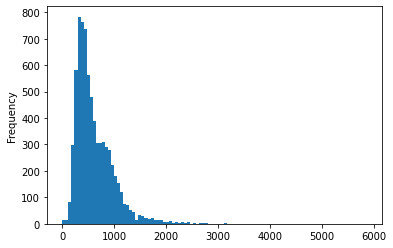

In [ ]:
df.content_for_ml.str.split(" ").str.len().plot.hist(bins=100)

In [ ]:
cd ..

/content


In [ ]:
%ls drive/MyDrive/Colab\ Notebooks/datasets/

livedoor-news/


In [ ]:
df.to_csv("drive/MyDrive/Colab Notebooks/datasets/livedoor-news/data.csv", index=None)

# モデル作成 + 学習

In [ ]:
class RuleBasedModel():
  def __init__(self, text_col=""):
    self.text_col = text_col

  def fit(self, X, y):
    df_ = pd.concat([X, y], axis=1)
    word_set_df = df_.groupby("category").apply(lambda g: set(" ".join(g[self.text_col].values).split(" ")))
    self.category_uniq_dict = dict()
    for c in word_set_df.index.to_list():
      exclude_set = set()
      for exclude_c in word_set_df.index.to_list():
        if c == exclude_c:
          continue
        exclude_set = exclude_set | word_set_df[exclude_c]
      self.category_uniq_dict[c] = word_set_df[c] - exclude_set
  def predict(self, X):
    

In [ ]:
model = RuleBasedModel(text_col="content_for_ml")
model.fit(df.content_for_ml, df.category)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB

cv = CountVectorizer()
model = MultinomialNB()
model.fit(cv.fit_transform(X_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
model.score(cv.transform(X_train), y_train)

0.9311481768813034

In [ ]:
len(tfidfv.get_feature_names())

13952

In [ ]:
pd.DataFrame(model.feature_count_, index=le.classes_, columns=tfidfv.get_feature_names())

,00,000,001,007,01,02,03,04,05,06,07,08,09,10,100,1000,10000,101,102,103,104,105,106,107,108,109,11,110,1100,111,112,114,115,116,117,119,12,120,1200,121,...,高麗,高齢,髪型,魅了,魅力,魔女,魔法,魔物,魔王,魔神,魚介,鮮やか,鮮明,鳥栖,鳥類,鳩山,鳴き声,鳴らし,鳴り,鳴門,鶴岡,鶴田,鶴見,鹿児島,麻布,麻生,麻痺,麻薬,麻衣,黄色,黄色い,黄金,黒い,黒く,黒人,黒字,黒星,黒木,黒田,齋藤
dokujo-tsushin,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,13.0,1.0,0.0,0.0,...,0.0,2.0,1.0,2.0,25.0,9.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
it-life-hack,4.0,2.0,0.0,0.0,9.0,3.0,3.0,6.0,8.0,0.0,0.0,1.0,0.0,23.0,21.0,5.0,0.0,2.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,21.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,16.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,14.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kaden-channel,10.0,12.0,0.0,2.0,7.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,2.0,99.0,26.0,5.0,1.0,3.0,4.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,52.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,57.0,0.0,0.0,0.0,...,0.0,2.0,1.0,0.0,10.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
livedoor-homme,1.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0,6.0,71.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
movie-enter,2.0,11.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,117.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,11.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,60.0,1.0,0.0,0.0,...,0.0,0.0,2.0,3.0,14.0,3.0,7.0,3.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,0.0,2.0,0.0,1.0,15.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
peachy,2.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,41.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0,1.0,0.0,...,1.0,0.0,1.0,9.0,26.0,3.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
smax,15.0,9.0,1.0,0.0,72.0,35.0,16.0,60.0,64.0,87.0,50.0,26.0,37.0,107.0,6.0,1.0,0.0,16.0,15.0,1.0,4.0,2.0,9.0,3.0,3.0,0.0,44.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sports-watch,4.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,64.0,19.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0
topic-news,4.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0,12.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,59.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,1.0,0.0,...,0.0,4.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,3.0,5.0,0.0


In [ ]:
X_train[X_train.str.contains(" 05 ")], y_train[X_train.str.contains(" 05 ")]

(4201    ゼロ から 始める スマート フォン 先行 し て ソニー ##モ ##バイル ##コミュニ...
 4337    AR ##RO ##WS ##X ##F - 10 D が 7 月 20 日 発売 予定 !...
 4236    AR ##RO ##WS ##X ##F - 05 D に ソフトウェア 更新 ! NTT ...
 3718    ディズニー ##ス ##マ ##ホ に 不具合 ! NTT ドコモ は 9 日 、 4 . ...
 3787    AR ##RO ##WS ##X ##F - 05 D に ソフトウェア 更新 ! NTT ...
 3692    X ##per ##ia ##G ##X ##S ##O - 04 D と X ##per ...
 3951    本当 ##は 裸 が 一番 な ん だ けど ......。 5 インチ の 大 画面 ディ...
 4124    ち ##っち ##ゃく て 高 機能 な X ##per ##ia ##S ##X は 買い...
 4022    X ##per ##ia ##S ##X ##S ##O - 05 D が 8 月 10 日...
 4347    Op ##t ##im ##us ##it ##L - 05 D が 発表 ! NTT ドコ...
 4145    Android お 絵 ##描 ##き アプリ の 本 ##命 ! NTT ドコモ から 販...
 4239    2012 年 8 月 6 〜 12 日 に 紹介 し た Android アプリ ! 先 #...
 4304    Android 4 . 0 へ の バージョンアップ 対象 機種 が 追加 ! NTT ドコ...
 3709    モバイル で お 絵 ##か ##き ♪ NTT ドコモ から 販売 中 の 「 GA ##...
 4330    X ##i 対応 スマ ##ホ が 実質 値 ##引き ! NTT ドコモ は 18 日 、...
 3758    ME ##DI ##AS ##ES ##N - 05 D に ソフトウェア 更新 ! NTT...
 4175    Op ##t ##im ##us ##it ##L - 05 D の 画面 キャプ ##チャ.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
pd.DataFrame(confusion_matrix(y_val, model.predict(cv.transform(X_val))), index="(予測)"+le.classes_, columns=le.classes_)

,dokujo-tsushin,it-life-hack,kaden-channel,livedoor-homme,movie-enter,peachy,smax,sports-watch,topic-news
(予測)dokujo-tsushin,112,2,2,0,2,9,0,1,2
(予測)it-life-hack,8,95,16,0,1,2,7,0,1
(予測)kaden-channel,8,8,91,1,1,5,7,0,9
(予測)livedoor-homme,15,7,6,40,4,5,0,0,0
(予測)movie-enter,1,2,2,0,120,1,0,1,3
(予測)peachy,17,1,3,1,10,89,3,1,2
(予測)smax,2,9,2,1,0,9,107,0,0
(予測)sports-watch,1,1,0,0,0,0,0,128,5
(予測)topic-news,2,1,6,0,1,1,0,9,96


In [ ]:
from sklearn.linear_model import LogisticRegression
tfidfv = TfidfVectorizer()
model = LogisticRegression()
model.fit(tfidfv.fit_transform(X_train), y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(tfidfv.transform(X_val), y_val)

0.8190045248868778

In [ ]:
pd.DataFrame(confusion_matrix(y_val, model.predict(tfidfv.transform(X_val))), index="(予測)"+le.classes_, columns=le.classes_)

,dokujo-tsushin,it-life-hack,kaden-channel,livedoor-homme,movie-enter,peachy,smax,sports-watch,topic-news
(予測)dokujo-tsushin,108,2,2,0,2,13,0,2,1
(予測)it-life-hack,6,105,11,0,3,0,4,1,0
(予測)kaden-channel,7,12,100,0,1,6,2,1,1
(予測)livedoor-homme,17,8,6,37,3,5,0,1,0
(予測)movie-enter,0,0,1,0,124,1,0,2,2
(予測)peachy,17,0,4,0,10,91,2,1,2
(予測)smax,0,5,3,0,1,3,118,0,0
(予測)sports-watch,2,0,0,0,0,1,0,127,5
(予測)topic-news,1,1,7,0,2,2,0,8,95


In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(
    objective="multiclass"
)
model.fit(tfidfv.fit_transform(X_train), y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31,
               objective='multiclass', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
model.score(tfidfv.transform(X_val), y_val)

0.8180995475113122

In [ ]:
pd.DataFrame(confusion_matrix(y_val, model.predict(tfidfv.transform(X_val))), index="(予測)"+le.classes_, columns=le.classes_)

,dokujo-tsushin,it-life-hack,kaden-channel,livedoor-homme,movie-enter,peachy,smax,sports-watch,topic-news
(予測)dokujo-tsushin,107,0,5,4,3,11,0,0,0
(予測)it-life-hack,4,99,17,0,2,2,6,0,0
(予測)kaden-channel,1,11,109,1,4,2,1,0,1
(予測)livedoor-homme,10,5,8,41,3,7,0,1,2
(予測)movie-enter,5,0,6,1,113,1,0,3,1
(予測)peachy,15,1,5,1,7,98,0,0,0
(予測)smax,0,2,0,0,1,3,124,0,0
(予測)sports-watch,2,1,1,4,0,3,0,118,6
(予測)topic-news,1,2,6,0,1,4,0,7,95


In [ ]:
pd.DataFrame(model.feature_importances_, index=tfidfv.get_feature_names(), columns=["fi"]).sort_values("fi",ascending=False).head(100)

,fi
いる,633
ます,475
する,346
です,309
という,296
...,...
生活,64
報道,63
世界,62
ビデオ,62


In [ ]:
ß